# Covid-19 US States

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [4]:
df.nunique()

date       1117
state        56
fips         56
cases     42006
deaths    18740
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59646 entries, 0 to 59645
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    59646 non-null  object
 1   state   59646 non-null  object
 2   fips    59646 non-null  int64 
 3   cases   59646 non-null  int64 
 4   deaths  59646 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.3+ MB


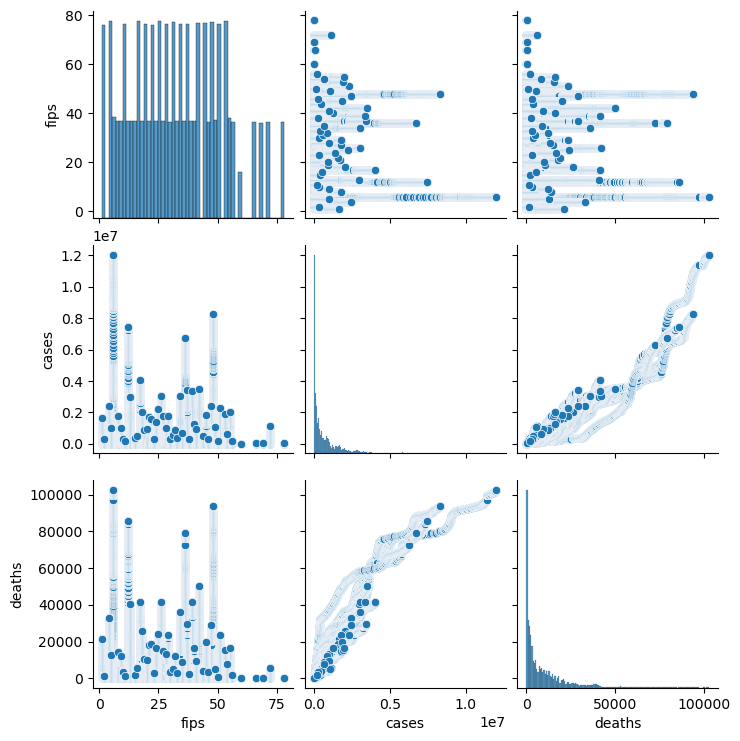

In [23]:
sns.pairplot(df)

<AxesSubplot:xlabel='deaths', ylabel='Count'>

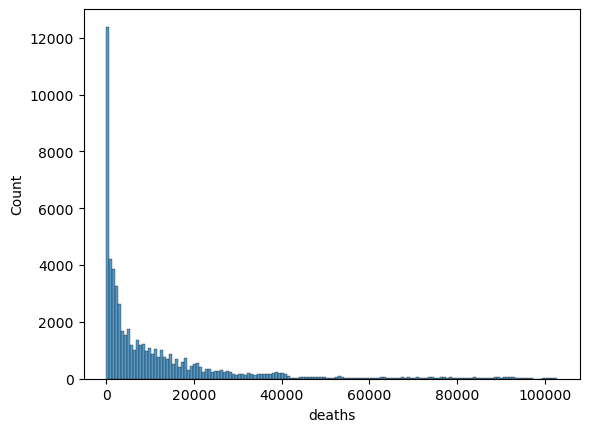

In [24]:
sns.histplot(df["deaths"])

In [26]:
df.describe()
#Not much used

,fips,cases,deaths
count,59646.000000,5.964600e+04,59646.000000
mean,32.236881,8.530942e+05,11456.920028
std,18.783799,1.420436e+06,16982.377033
min,1.000000,1.000000e+00,0.000000
25%,17.000000,6.646375e+04,1114.000000
50%,31.000000,3.335355e+05,4882.000000
75%,46.000000,1.004684e+06,14530.250000
max,78.000000,1.203232e+07,102767.000000


In [29]:
df["cases"][0]

1

In [27]:
# Cases and Deaths are cummulative, So make it individual

In [45]:
cases=[]
cases.append(df["cases"][0])

for i in range(1,len(df)):
    x = df["cases"][i] - cases[i-1]
    cases.append(x)

In [46]:
df["cases"]

0              1
1              1
2              1
3              1
4              1
          ...   
59641    2272871
59642    1915286
59643     637100
59644    1989983
59645     184251
Name: cases, Length: 59646, dtype: int64

In [55]:
 df.groupby(['state'])['cases'].transform(lambda s: s.sub(s.shift().fillna(0)).abs())

0           1.0
1           0.0
2           0.0
3           1.0
4           0.0
          ...  
59641    1348.0
59642       0.0
59643     251.0
59644     663.0
59645       0.0
Name: cases, Length: 59646, dtype: float64

In [66]:
df2 = pd.DataFrame(df[df["state"] == "Georgia"])

In [68]:
df2.head()

,date,state,fips,cases,deaths
256,2020-03-02,Georgia,13,2,0
271,2020-03-03,Georgia,13,2,0
287,2020-03-04,Georgia,13,2,0
305,2020-03-05,Georgia,13,2,0
326,2020-03-06,Georgia,13,3,0


In [79]:
df2.reset_index()

,index,date,state,fips,cases,deaths
0,256,2020-03-02,Georgia,13,2,0
1,271,2020-03-03,Georgia,13,2,0
2,287,2020-03-04,Georgia,13,2,0
3,305,2020-03-05,Georgia,13,2,0
4,326,2020-03-06,Georgia,13,3,0
...,...,...,...,...,...,...
1071,59377,2023-02-06,Georgia,13,2948175,40559
1072,59433,2023-02-07,Georgia,13,2948175,40559
1073,59489,2023-02-08,Georgia,13,2954862,40653
1074,59545,2023-02-09,Georgia,13,2954862,40653


In [80]:
df2 = df2.reset_index()

In [82]:
#state wise - Working Perfect
cases=[]
cases.append(df2["cases"][0])
x =df2["cases"][0] #1

for i in range(1,len(df2)):
    if df2['cases'][i] > x:
        y = df2["cases"][i] - df2["cases"][i-1]
        cases.append(y)
        x = df2["cases"][i]
    else:
        cases.append(0)

In [83]:
cases

[2,
 0,
 0,
 0,
 1,
 4,
 4,
 6,
 5,
 9,
 0,
 10,
 24,
 32,
 21,
 24,
 51,
 89,
 200,
 70,
 68,
 180,
 295,
 290,
 256,
 557,
 249,
 236,
 349,
 1084,
 631,
 697,
 523,
 416,
 359,
 816,
 1598,
 1048,
 681,
 974,
 402,
 0,
 1022,
 788,
 670,
 1061,
 1014,
 356,
 605,
 828,
 742,
 910,
 806,
 670,
 650,
 234,
 770,
 378,
 693,
 1131,
 1005,
 832,
 350,
 732,
 526,
 848,
 800,
 565,
 392,
 786,
 181,
 863,
 555,
 556,
 820,
 413,
 299,
 680,
 580,
 948,
 807,
 765,
 674,
 581,
 425,
 652,
 647,
 650,
 525,
 448,
 715,
 706,
 306,
 648,
 817,
 752,
 663,
 428,
 624,
 774,
 696,
 867,
 869,
 977,
 696,
 631,
 797,
 915,
 823,
 1077,
 1552,
 824,
 1212,
 1872,
 1713,
 1506,
 1746,
 1524,
 1734,
 2016,
 2464,
 2309,
 2886,
 2604,
 2513,
 1897,
 1526,
 2692,
 2831,
 2155,
 4904,
 2977,
 1815,
 3548,
 2642,
 3568,
 2701,
 3419,
 4074,
 2453,
 1994,
 3077,
 3255,
 4737,
 3875,
 3530,
 2214,
 2431,
 4131,
 3509,
 3998,
 3797,
 3492,
 2722,
 1954,
 2952,
 3933,
 2905,
 3976,
 4032,
 2839,
 2129,
 

In [130]:
df[df["state"] == "Georgia"]["daily_cases"] = cases

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7164\796352053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["state"] == "Georgia"]["daily_cases"] = cases


In [91]:
len(df.groupby("state").groups)

56

In [102]:
for i in df.groupby("state").groups:
    print (i)

Alabama
Alaska
American Samoa
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
District of Columbia
Florida
Georgia
Guam
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Northern Mariana Islands
Ohio
Oklahoma
Oregon
Pennsylvania
Puerto Rico
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virgin Islands
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [100]:
for i in df.groupby("state").groups:
    df2 = pd.DataFrame(df[df["state"] == i]).reset_index()
    #state wise - Working Perfect
    cases=[]
    cases.append(df2["cases"][0])
    x = df2["cases"][0] #1

    for i in range(1,len(df2)):
        if df2['cases'][i] > x:
            y = df2["cases"][i] - df2["cases"][i-1]
            cases.append(y)
            x = df2["cases"][i]
        else:
            cases.append(0)